In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import numpy as np


In [2]:
# Create data
X, y = make_regression(n_samples=500, n_features=10, noise=15, random_state=42)
y = y.reshape(-1, 1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to Tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [3]:
# MLP with Dropout
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(10, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)


In [4]:
model = MLP()


In [5]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [6]:
losses = []
epochs = 100

for epoch in range(epochs):
    model.train()  # Switch to training mode
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")


Epoch 0: Loss = 21553.6504
Epoch 10: Loss = 11056.8672
Epoch 20: Loss = 9424.1973
Epoch 30: Loss = 15615.5850
Epoch 40: Loss = 11486.8701
Epoch 50: Loss = 12601.7100
Epoch 60: Loss = 15040.6973
Epoch 70: Loss = 13395.4072
Epoch 80: Loss = 6476.2563
Epoch 90: Loss = 16709.2598


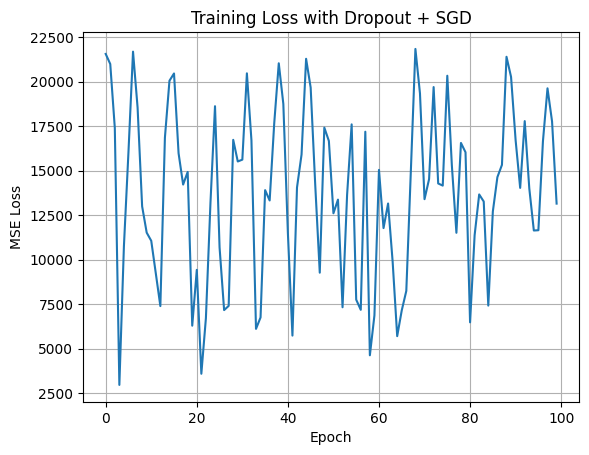

In [7]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss with Dropout + SGD")
plt.grid(True)
plt.show()


In [8]:
# Train with Adam optimizer
model_adam = MLP()
criterion_adam = nn.MSELoss()
optimizer_adam = torch.optim.Adam(model_adam.parameters(), lr=0.01)

losses_adam = []
for epoch in range(100):
    model_adam.train()
    optimizer_adam.zero_grad()
    outputs = model_adam(X_train_tensor)
    loss = criterion_adam(outputs, y_train_tensor)
    loss.backward()
    optimizer_adam.step()
    losses_adam.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")


NameError: name 'X_train_tensor' is not defined

In [9]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)


C:\Users\ataye\AppData\Local\Temp\ipykernel_15636\1096078422.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
C:\Users\ataye\AppData\Local\Temp\ipykernel_15636\1096078422.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32)


In [10]:
model_adam = MLP()
criterion_adam = nn.MSELoss()
optimizer_adam = torch.optim.Adam(model_adam.parameters(), lr=0.01)

losses_adam = []
for epoch in range(100):
    model_adam.train()
    optimizer_adam.zero_grad()
    outputs = model_adam(X_train_tensor)
    loss = criterion_adam(outputs, y_train_tensor)
    loss.backward()
    optimizer_adam.step()
    losses_adam.append(loss.item())
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")


Epoch 0: Loss = 21507.6230
Epoch 10: Loss = 21072.7520
Epoch 20: Loss = 20096.9023
Epoch 30: Loss = 18311.0645
Epoch 40: Loss = 15887.4746
Epoch 50: Loss = 12856.2891
Epoch 60: Loss = 9462.3125
Epoch 70: Loss = 6413.6118
Epoch 80: Loss = 3884.6013
Epoch 90: Loss = 2257.3496


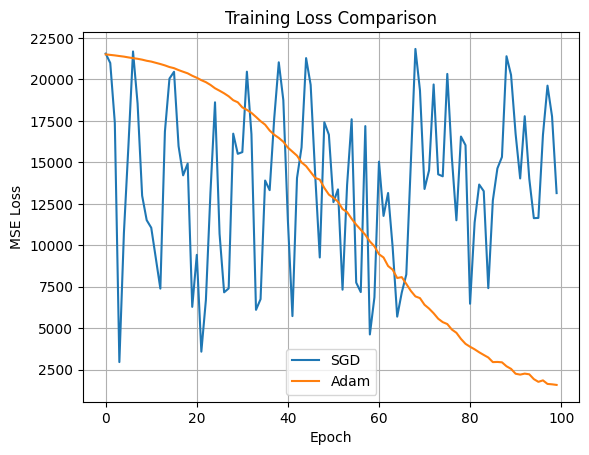

In [11]:
plt.plot(losses, label="SGD")
plt.plot(losses_adam, label="Adam")
plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Z